In [166]:
import pandas as pd
from pandas import *
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [167]:
data =pd.read_csv('DMV10042.csv',index_col=0)
data

,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
Ozone_ Contn,,,,,,
0.014,17.0,0.1,36,17.0,25.0,39
0.025,14.0,0.3,80,14.0,13.0,26
0.049,19.0,0.4,64,19.0,24.0,35
0.042,18.0,0.1,80,18.0,21.0,26
0.027,34.0,0.3,76,34.0,37.0,31
...,...,...,...,...,...,...
0.023,31.2,0.4,41,31.2,14.6,24
0.019,34.4,0.4,48,34.4,14.5,24
0.037,54.0,0.3,76,54.0,47.0,62


## Evaluation of the Regression Analysis 

In [170]:
data =data.reindex(columns=[' NO2_Contn','CO_ Concn','Temp_ Avg ', 'SO2 _Contn', ' PM2.5_Contn',
       'deathIncrease'])

C:\Users\Tamrat\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


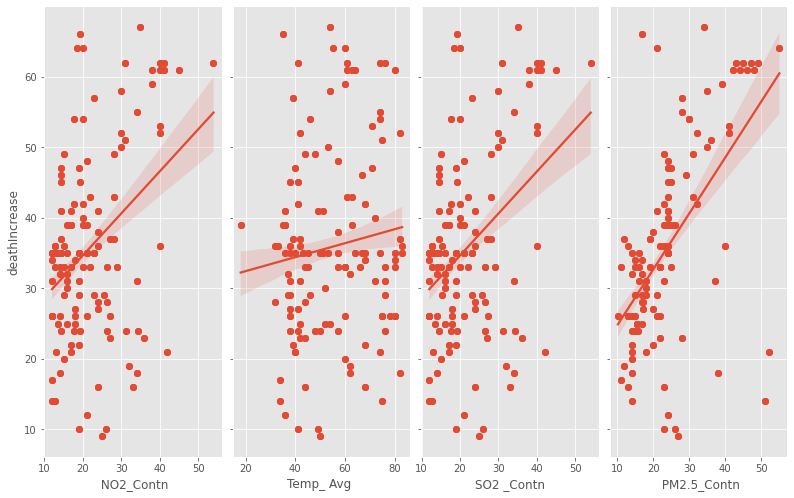

In [171]:
sns.pairplot(data,x_vars=[' NO2_Contn','Temp_ Avg ', 'SO2 _Contn', ' PM2.5_Contn'],y_vars ='deathIncrease',size=7,aspect=0.4,kind='reg')

In [172]:
feature_col =['NO2_Contn','Temp_ Avg ', 'SO2 _Contn', ' PM2.5_Contn']

In [173]:
train,test=train_test_split(data,test_size=0.2,random_state=42)

In [174]:
len(train)

309

In [175]:
len(test)

78

In [176]:
y=data['deathIncrease']

In [177]:
y

 Ozone_ Contn
0.014    39
0.025    26
0.049    35
0.042    26
0.027    31
         ..
0.023    24
0.019    24
0.037    62
0.015    29
0.010    28
Name: deathIncrease, Length: 387, dtype: int64

In [178]:
x=data[[' NO2_Contn','Temp_ Avg ', 'SO2 _Contn', ' PM2.5_Contn']] 

In [179]:
x

,NO2_Contn,Temp_ Avg,SO2 _Contn,PM2.5_Contn
Ozone_ Contn,,,,
0.014,17.0,36,17.0,25.0
0.025,14.0,80,14.0,13.0
0.049,19.0,64,19.0,24.0
0.042,18.0,80,18.0,21.0
0.027,34.0,76,34.0,37.0
...,...,...,...,...
0.023,31.2,41,31.2,14.6
0.019,34.4,48,34.4,14.5
0.037,54.0,76,54.0,47.0


In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=42)

In [181]:
reg =LinearRegression( )
reg.fit(data[['Temp_ Avg ','SO2 _Contn', ' PM2.5_Contn']],data.deathIncrease)

LinearRegression()

In [182]:
y_pred = reg.fit(x_train,y_train)
y_pred

LinearRegression()

In [183]:
y_pred =reg.predict(x_test)
y_pred 

array([48.33674434, 38.89213767, 33.84071817, 36.40488043, 33.32403188,
       35.43646314, 35.35982604, 35.65718068, 27.35366621, 45.42448836,
       31.26734636, 35.64965545, 39.00558138, 32.22323177, 36.4597919 ,
       57.24068842, 57.42741638, 42.62372384, 31.06658444, 33.32403188,
       48.33674434, 49.59360514, 35.33716142, 35.13733523, 52.98194108,
       36.67845245, 35.66080143, 27.35366621, 26.20920535, 36.82151967,
       34.77466846, 37.62413089, 31.88601611, 29.78908492, 57.24068842,
       52.98194108, 51.84443911, 31.06658444, 46.10774075, 31.26734636,
       36.0546713 , 51.50910147, 30.9032757 , 32.22323177, 40.20289672,
       36.99504465, 35.63256382, 36.4239243 , 33.00028711, 28.61331351,
       33.47146517, 38.21539728, 33.47146517, 34.77466846, 27.26634472,
       37.62413089, 31.26734636, 45.42448836, 29.78908492, 51.13054997,
       26.09311043, 29.86051841, 29.41874175, 36.22141638, 58.39119969,
       51.26337969, 28.78185038, 35.33716142, 35.33000885, 31.66

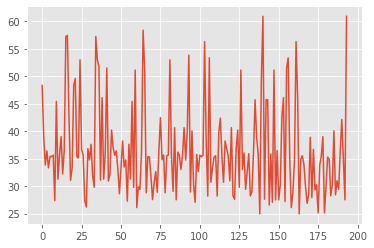

In [184]:
plt.plot(y_pred)

In [185]:
# 3 Best metrics to evaluate Regression Model?
# MSE ,R Square, Adjusted R Square, RMSE, MAE

In [186]:
reg.coef_ 

array([ 0.05062698, -0.02461687,  0.05062698,  0.80261122])

In [187]:
reg.intercept_

15.921129040791705

In [188]:
# MSE - squared distance between actual and predicted values

In [189]:
from sklearn.metrics import mean_squared_error 

In [190]:
mean_squared_error(y_test,y_pred)

154.91883585129378

In [191]:
mean_squared_error(y_test,y_pred,squared=False)

12.446639540506256

In [192]:
# R Square

In [193]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.23226365481742872

In [194]:
# Adjusted R Square

# Adjusted R2 = 1 – [ (1-R2)* (n-1)/ (n-k-1)] 
# Because R2 always increases as you add more predictors to a model, 
# adjusted R2 can serve as a metric that tells you how useful
# a model is, adjusted for the number of predictors in a model.

In [195]:

r2 = r2_score(y_test,y_pred)

n= len(y_test)
k= len(x_test.columns)

adj_r2= 1-(((1-r2)*(r2-1))/(n-k-1)) 
adj_r2       

1.0031186195540438

In [196]:
# RMSE

In [197]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 12.446639540506256


In [198]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred)))) # Taking the log of the RMSE metric slows down the scale of error

RMSE 2.5214506700515216


In [199]:
# MAE = which calculates the absolute difference between actual and predicted values.

In [200]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 8.421614401138214


In [201]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
pd.DataFrame(reg.coef_,x.columns,columns=['Coeff'])

,Coeff
NO2_Contn,0.050627
Temp_ Avg,-0.024617
SO2 _Contn,0.050627
PM2.5_Contn,0.802611


In [203]:
reg.fit(data[['Temp_ Avg ','SO2 _Contn', ' PM2.5_Contn']],data.deathIncrease) 

LinearRegression()

In [218]:
#B1 = Correlation * (Std. Dev. of y_train / Std. Dev. of x_train)
# B0 = Mean(y_train) – B1 * Mean(x_train)

In [212]:
reg.coef_

array([0.01943212, 0.08241618, 0.74439551])

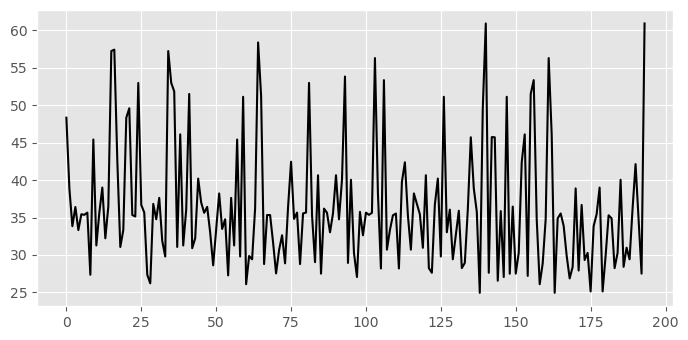

In [217]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(y_pred, color='k', label='Regression model')
#ax.scatter(x, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
#ax.set_ylabel('deathIncrease'),fontsize=14)
#ax.set_xlabel('PM2.5_Contn'), fontsize=14)
#ax.legend(facecolor='white', fontsize=11)
#ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()